In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Wine.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [3]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

##### applying pca

In [5]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [6]:
pca.singular_values_

array([26.09369   , 18.88432045])

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [9]:
y_predict = classifier.predict(x_test)
np.concatenate((y_predict.reshape(len(y_predict),1), y_test.reshape(len(y_test),1)),1)

array([[1, 1],
       [3, 3],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [3, 3],
       [2, 2],
       [2, 2],
       [3, 3],
       [3, 3],
       [1, 1],
       [2, 2],
       [3, 3],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [3, 3],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [10]:
x_test

array([[ 2.20685211e+00, -1.02850086e+00],
       [-2.53651962e+00, -1.83644227e+00],
       [ 2.19183305e+00,  1.81240519e+00],
       [ 2.51489251e+00, -1.38907803e+00],
       [-3.47991313e-01,  5.25397912e-01],
       [ 1.44174066e+00, -2.89674514e-01],
       [ 2.11892046e+00, -1.62960181e+00],
       [-3.06045961e+00, -6.70950629e-01],
       [-2.35436876e-01,  2.16810201e+00],
       [-1.21230749e+00,  2.12204944e+00],
       [-2.20706720e+00, -2.61457262e-01],
       [-4.19759580e+00, -5.36505538e-01],
       [ 3.11063501e+00, -2.26380692e+00],
       [ 2.39878282e+00,  1.29482006e+00],
       [-2.16102953e+00, -1.95327620e+00],
       [ 9.26627235e-01,  3.35678339e+00],
       [ 1.96950425e+00, -1.65130081e+00],
       [ 3.61413167e+00, -2.68087967e+00],
       [-1.71986182e+00,  9.29936963e-01],
       [ 2.93212799e+00, -8.79320756e-01],
       [ 2.36911995e+00,  1.73171845e+00],
       [ 1.23368522e+00, -1.56525793e-01],
       [ 1.07525557e+00, -8.97240861e-01],
       [ 5.

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_predict)

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [12]:
accuracy_score(y_predict, y_test)

0.9722222222222222

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


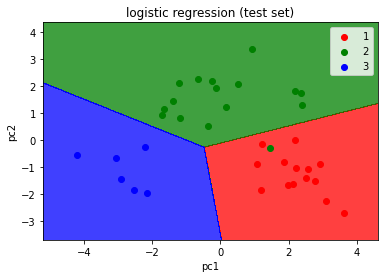

In [16]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test, y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max() + 1, step=0.01),
                  np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('logistic regression (test set)')
plt.xlabel('pc1')
plt.ylabel("pc2")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


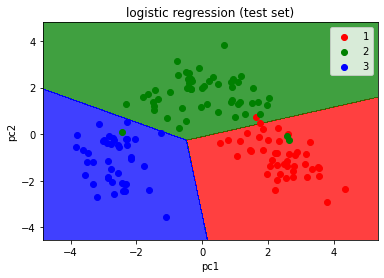

In [15]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train, y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max() + 1, step=0.01),
                  np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('logistic regression (test set)')
plt.xlabel('pc1')
plt.ylabel("pc2")
plt.legend()
plt.show()